## Showing distributuins

### T-SNE

**


/tmp/ipykernel_30027/4179284942.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cold_cmap = plt.cm.get_cmap('Blues', 9)  # 获取Blues色系的9种渐变颜色
/tmp/ipykernel_30027/4179284942.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  warm_cmap = plt.cm.get_cmap('Oranges', 9)  # 获取Oranges色系的9种渐变颜色
/tmp/ipykernel_30027/4179284942.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  deep_blue_cmap = plt.cm.get_cmap('Blues')
/tmp/ipykernel_30027/4179284942.py:110: MatplotlibDeprecati

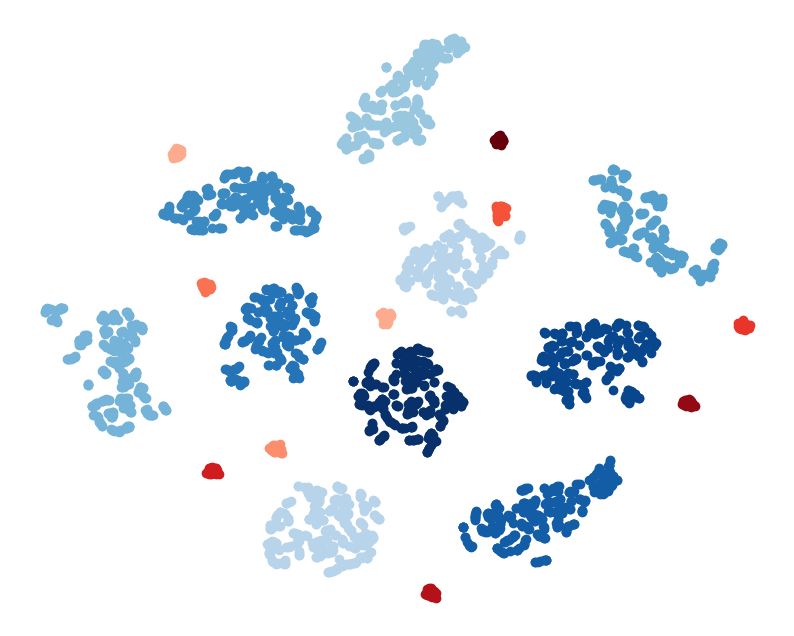

In [1]:

import os
import torch
import numpy as np

def load_data(folder,matches):
    features = []
    labels = []
    label = 0
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if subdir in matches:
            if os.path.isdir(subdir_path):
                for file in os.listdir(subdir_path):
                    if file.endswith('.pt'):
                        file_path = os.path.join(subdir_path, file)
                        
                        # 加载.pt文件并转换为numpy数组
                        feature = torch.load(file_path).numpy()
                        features.append(feature)
                        labels.append(label)
                label += 1
    return np.array(features), np.array(labels)

# 两个文件夹路径
folder1 = '/home/caz/VisualSearch/facefrensics++/new_split/deepfakes/all'
folder2 = '/home/caz/VisualSearch/facefrensics++/new_split/real/split_20231215/train'
##selectd points
matches=['109', '109_107_deepfakes', '226', '226_491_deepfakes', '461',
       '461_250_deepfakes', '478', '478_506_deepfakes', '531',
       '531_549_deepfakes', '639', '639_841_deepfakes', '809',
       '809_799_deepfakes', '885', '885_802_deepfakes', '964',
       '964_174_deepfakes', '996', '996_056_deepfakes']

# 加载数据
features1, labels1 = load_data(folder1,matches)
features2, labels2 = load_data(folder2,matches)

# 调整第二个文件夹的标签，使之不与第一个文件夹的标签重复
labels2 += labels1.max() + 1

# 合并特征和标签
features = np.vstack((features1, features2)).squeeze(axis=1)
labels = np.concatenate((labels1, labels2))
print("**")

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(features)

import matplotlib.pyplot as plt

# 定义两组指定的颜色
# cold_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
# warm_colors = ['#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf']

# 冷色调 - 以蓝色为主
# cold_colors = ['#1f77b4', '#aec7e8', '#5B8E7D', '#73A9AD', '#507DBC']

# # 暖色调 - 以红色为主
# warm_colors = ['#d62728', '#ff9896', '#FF7F0E', '#FEB24C', '#FD8D3C']
# 冷色调
cold_colors = [
    '#1f77b4',  # 深蓝色
    '#aec7e8',  # 浅蓝色
    '#7f7f7f',  # 灰色
    '#ff7f0e',  # 淡橙色（对比色）
    '#2ca02c',  # 绿色
    '#98df8a',  # 浅绿色
    '#d62728',  # 红色（对比色）
    '#ff9896',  # 浅红色
    '#9467bd',  # 紫色
]
# 暖色调
warm_colors = [
    '#d62728',  # 红色
    '#ff9896',  # 浅红色
    '#ff7f0e',  # 橙色
    '#ffbb78',  # 浅橙色
    '#2ca02c',  # 绿色（对比色）
    '#98df8a',  # 浅绿色（对比色）
    '#1f77b4',  # 蓝色（对比色）
    '#aec7e8',  # 浅蓝色（对比色）
    '#e377c2',  # 粉红色
]

import matplotlib.pyplot as plt

# 冷色调渐变色系
cold_cmap = plt.cm.get_cmap('Blues', 9)  # 获取Blues色系的9种渐变颜色
cold_colors = [cold_cmap(i) for i in range(cold_cmap.N)]  # 提取颜色


# 暖色调渐变色系
warm_cmap = plt.cm.get_cmap('Oranges', 9)  # 获取Oranges色系的9种渐变颜色
warm_colors = [warm_cmap(i) for i in range(warm_cmap.N)]  # 提取颜色




import matplotlib.pyplot as plt
import numpy as np

# 创建更深的蓝色渐变色系
deep_blue_cmap = plt.cm.get_cmap('Blues')
cold_colors = [deep_blue_cmap(i) for i in np.linspace(0.3, 1, 9)]


# 创建更深的橙色渐变色系
deep_orange_cmap = plt.cm.get_cmap('Reds')
warm_colors = [deep_orange_cmap(i) for i in np.linspace(0.3, 1, 9)]


# 绘制t-SNE图
plt.figure(figsize=(10, 8))
for label in np.unique(labels1):
    indices = labels == label
    color = cold_colors[label % len(cold_colors)]
    plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1], c=color, label=f'Folder1 Class {label}')

for label in np.unique(labels2):
    indices = labels == label
    color = warm_colors[(label - labels1.max() - 1) % len(warm_colors)]
    plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1], c=color, label=f'Folder2 Class {label}')

# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
# plt.title('t-SNE Visualization of .pt Files from Two Folders')
# plt.legend()

# 移除横纵坐标
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('tsne_visualization.pdf', bbox_inches='tight', dpi=300)
plt.show()



### color bar

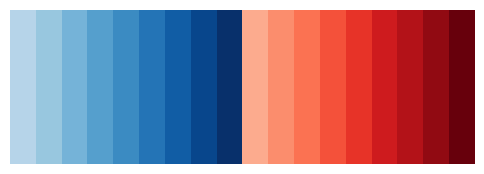

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 定义两个colormap
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Reds

# 创建一个从两个colormap中各取一半颜色的新colormap
colors = np.vstack((cmap1(np.linspace(0.3, 1, 9)), cmap2(np.linspace(0.3, 1, 9))))
mixed_cmap = mcolors.LinearSegmentedColormap.from_list('mixed', colors)

# 使用imshow绘制色条
plt.figure(figsize=(6, 2))
plt.imshow([colors], aspect='auto')
plt.axis('off')  # 关闭坐标轴
plt.savefig('color.pdf', bbox_inches='tight', dpi=300)
# 显示色条
plt.show()



## Smooth Energy score

### Hyperbolic

Face2face
5705
max of in_distribution_energy  -1.7566923
min of in_distribution_energy  -5.2969546
-1.7566923 -5.2969546


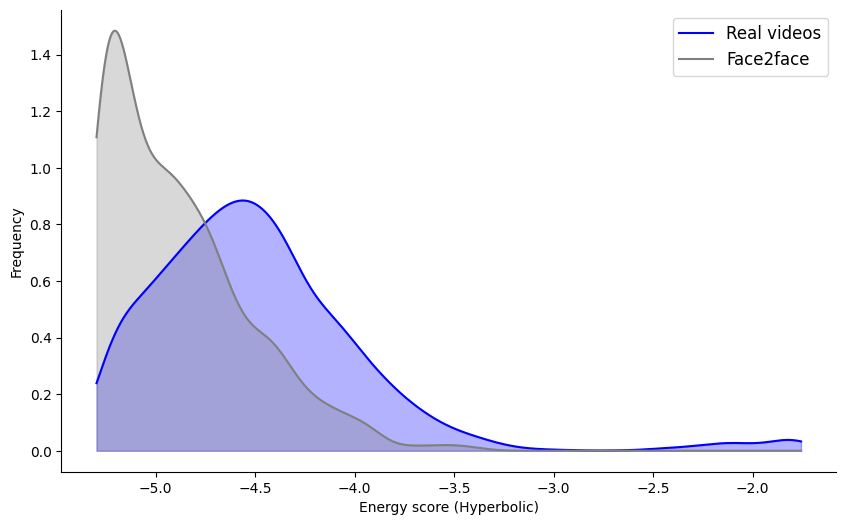

Neuraltextures
5705
max of in_distribution_energy  -1.7566923
min of in_distribution_energy  -5.2969546
-1.7566923 -5.2969546


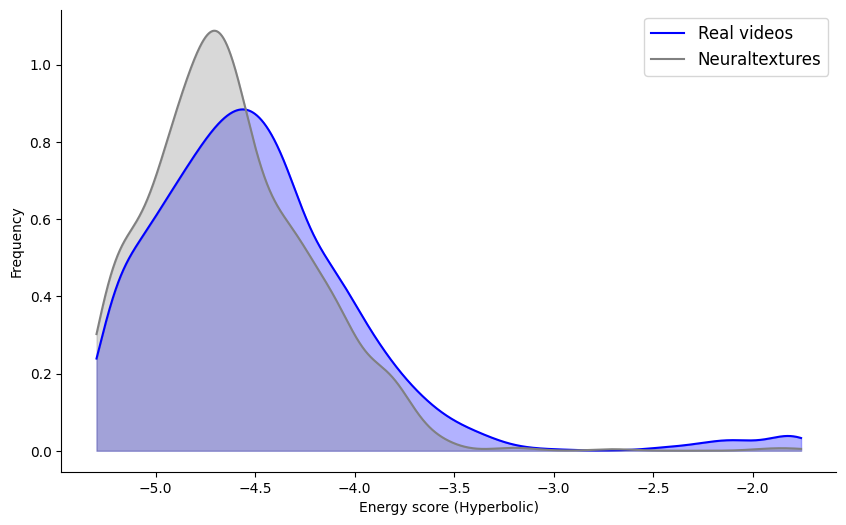

Deepfakes
5705
max of in_distribution_energy  -1.7566923
min of in_distribution_energy  -5.2969546
-1.7566923 -5.2969546


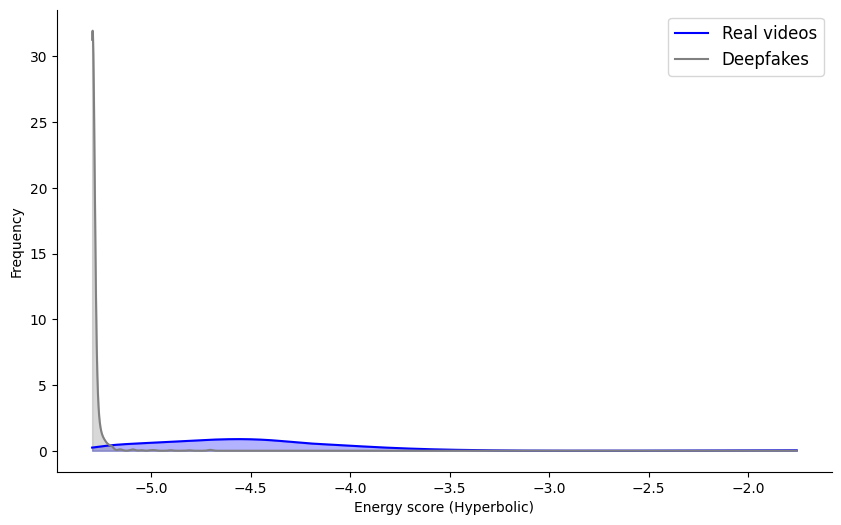

Faceswap
5705
max of in_distribution_energy  -1.7566923
min of in_distribution_energy  -5.2969546
-1.7566923 -5.2969546


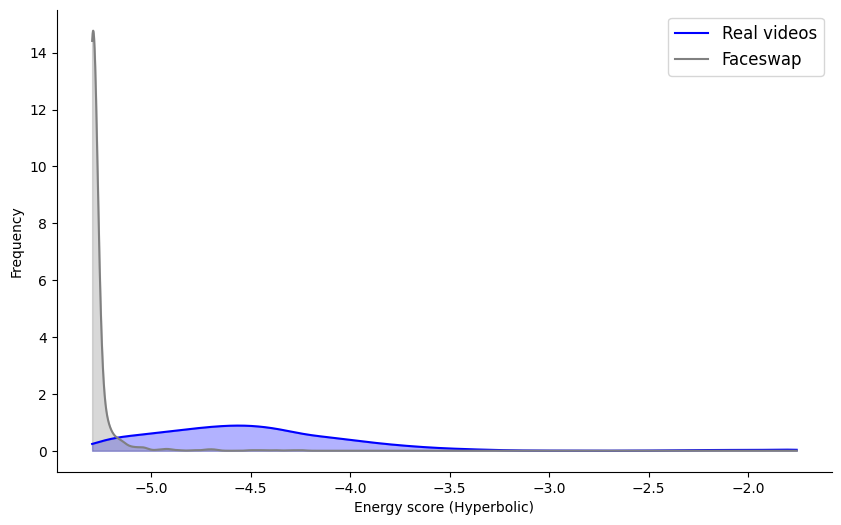

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde



import os

def find_files_with_extension(directory, extension):
    matching_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                matching_files.append(os.path.join(root, file))
    return matching_files

# Example usage:
# directory_path = '/path/to/your/directory'
directory_path = '/home/caz/hyp_deepfake/tenglong_branch/hyp/ffppc23/2023-12-30_07-02-02'
file_extension = '_score.pt'  # Replace with your specific file extension
files = find_files_with_extension(directory_path, file_extension)
# print(files)


import torch

def load_pt_files(file_paths):
    loaded_objects = []
    for file_path in file_paths:
        try:
            # Load the .pt file content
            loaded_objects.append(torch.load(file_path))
        except Exception as e:
            print(f"An error occurred while loading {file_path}: {e}")
    return loaded_objects



s = load_pt_files(files)



# Assuming you have the in-distribution and out-of-distribution energy scores
# Replace these with your actual energy scores data
for i in range(len(s)):
    dataset=files[i].split('/')[-1].split('_score.pt')[0].capitalize()
    print(dataset)
                           
    in_distribution_energy = s[i]['in_score']
    out_distribution_energy =  s[i]['out_score']
    print(len(in_distribution_energy))
    print('max of in_distribution_energy ',in_distribution_energy.max())
    print('min of in_distribution_energy ',in_distribution_energy.min())

    maxv = max(in_distribution_energy.max(),out_distribution_energy.max())
    minv = min(in_distribution_energy.min(),out_distribution_energy.min())
    print(maxv,minv)
    
    
    # Create a kernel density estimate (KDE) for the distributions
    kde_in = gaussian_kde(in_distribution_energy)
    kde_out = gaussian_kde(out_distribution_energy)
    
    # Create a range of values to evaluate the KDE on
    x_eval = np.linspace(minv,maxv, len(in_distribution_energy))
    
    # Evaluate the KDE for in-distribution and out-of-distribution
    kde_in_values = kde_in(x_eval)
    kde_out_values = kde_out(x_eval)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the KDE lines
    plt.plot(x_eval, kde_in_values, color='blue', label='Real videos')
    plt.fill_between(x_eval, kde_in_values, color='blue', alpha=0.3)
    
    plt.plot(x_eval, kde_out_values, color='grey', label=dataset)
    plt.fill_between(x_eval, kde_out_values, color='grey', alpha=0.3)
    
    # Add a vertical line for the threshold
    # threshold_value = 0
    # plt.axvline(threshold_value, color='black', linestyle='--', label='threshold τ')
    # plt.axvline(threshold_value, color='black', linestyle='--')
    
    # Add labels and title
    plt.xlabel('Energy score (Hyperbolic)')
    plt.ylabel('Frequency')
    # plt.title('Smooth Distribution of Energy score')
    
    # Add legend
    # plt.legend()
    plt.legend(fontsize='large')
    
    # Remove the top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # # 设置y轴的显示范围，例如从0到5
    # plt.ylim([0, 5])
    
    # 调整图形大小，例如宽度更大，高度更小
    # plt.figure(figsize=(10, 5))  # 宽度为10英寸，高度为5英寸
    plt.savefig('{}_hyperbolic_energy_socre.pdf'.format(dataset), bbox_inches='tight', dpi=300)
    
    # Show plot
    plt.show()


### Euclidean

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde



import os

def find_files_with_extension(directory, extension):
    matching_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                matching_files.append(os.path.join(root, file))
    return matching_files

# Example usage:
# directory_path = '/path/to/your/directory'
# directory_path = '/home/caz/hyp_deepfake/tenglong_branch/hyp/ffppc23/2023-12-30_07-02-02'
directory_path='/home/caz/hyp_deepfake/tenglong_branch/linear/ffppc23/2023-12-31_02-17-11'
file_extension = '_score.pt'  # Replace with your specific file extension
files = find_files_with_extension(directory_path, file_extension)
# print(files)


import torch

def load_pt_files(file_paths):
    loaded_objects = []
    for file_path in file_paths:
        try:
            # Load the .pt file content
            loaded_objects.append(torch.load(file_path))
        except Exception as e:
            print(f"An error occurred while loading {file_path}: {e}")
    return loaded_objects


s = load_pt_files(files)



# Assuming you have the in-distribution and out-of-distribution energy scores
# Replace these with your actual energy scores data
for i in range(len(s)):
    dataset=files[i].split('/')[-1].split('_score.pt')[0].capitalize()
    print(dataset)
                           
    in_distribution_energy = s[i]['in_score']
    out_distribution_energy =  s[i]['out_score']
    print(len(in_distribution_energy))
    print('max of in_distribution_energy ',in_distribution_energy.max())
    print('min of in_distribution_energy ',in_distribution_energy.min())

    maxv = max(in_distribution_energy.max(),out_distribution_energy.max())
    minv = min(in_distribution_energy.min(),out_distribution_energy.min())
    print(maxv,minv)
    
    
    # Create a kernel density estimate (KDE) for the distributions
    kde_in = gaussian_kde(in_distribution_energy)
    kde_out = gaussian_kde(out_distribution_energy)
    
    # Create a range of values to evaluate the KDE on
    x_eval = np.linspace(minv,maxv, len(in_distribution_energy))
    
    # Evaluate the KDE for in-distribution and out-of-distribution
    kde_in_values = kde_in(x_eval)
    kde_out_values = kde_out(x_eval)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the KDE lines
    plt.plot(x_eval, kde_in_values, color='blue', label='Real videos', alpha=0.8)
    plt.fill_between(x_eval, kde_in_values, color='blue', alpha=0.3)
    
    plt.plot(x_eval, kde_out_values, color='grey', label=dataset,alpha=0.8)
    plt.fill_between(x_eval, kde_out_values, color='grey', alpha=0.3)
    
    # Add a vertical line for the threshold
    # threshold_value = 0
    # plt.axvline(threshold_value, color='black', linestyle='--', label='threshold τ')
    # plt.axvline(threshold_value, color='black', linestyle='--')
    
    # Add labels and title
    plt.xlabel('Energy score (Euclidean)')
    plt.ylabel('Frequency')
    # plt.title('Smooth Distribution of Energy score')
    
    # Add legend
    plt.legend()
    
    # Remove the top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # # 设置y轴的显示范围，例如从0到5
    # plt.ylim([0, 5])
    
    # 调整图形大小，例如宽度更大，高度更小
    # plt.figure(figsize=(10, 5))  # 宽度为10英寸，高度为5英寸
    plt.savefig('{}_Euclidean_energy_socre.pdf'.format(dataset), bbox_inches='tight', dpi=300)
    
    # Show plot
    plt.show()


### Synthetic distribution in fig2

/tmp/ipykernel_30027/3958684847.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1, label='Distribution 1', hist=False)
/tmp/ipykernel_30027/3958684847.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2, label='Distribution 2', hist=False)
/tmp/ipykernel_30027/3

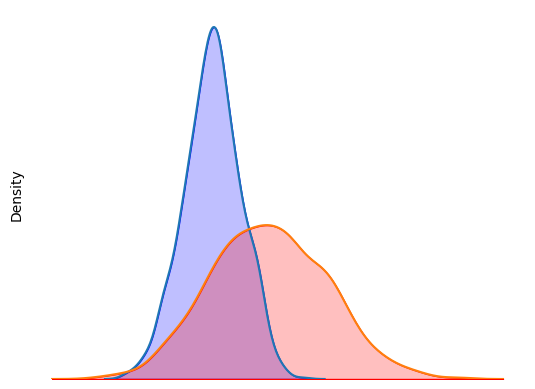

In [5]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set num of data points
num_data = 1000

# set means and standard deviations for two gaussian distributions
mean1 = 6
std1 = 1
mean2 = 8
std2 = 2

# generate data from two gaussian distributions
data1 = np.random.normal(mean1, std1, num_data)
data2 = np.random.normal(mean2, std2, num_data)

# plot the distribution of the data
sns.distplot(data1, label='Distribution 1', hist=False)
sns.distplot(data2, label='Distribution 2', hist=False)

# shade the area between two distributions
sns.kdeplot(data1, shade=True, label='Distribution 1', color='blue')
sns.kdeplot(data2, shade=True, label='Distribution 2', color='red')

# plt.legend()
# plt.xlabel('Data value')
# plt.ylabel('Density')
# plt.title('Overlapped Bell-shaped Distributions')
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Optionally, remove the ticks as well
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('show1.pdf', bbox_inches='tight', dpi=300)
plt.show()